# Autogluon Object Detection Demo on tiny COCO Dataset

In [1]:
from autogluon.multimodal import MultiModalPredictor
from autogluon.multimodal.presets import get_automm_presets
from autogluon.multimodal.utils import Visualizer
import os
import time
import json
import yaml
import uuid
import torch

e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Check the default parameters for all presets

### medium quality

In [2]:
hyperparameters, hyperparameter_tune_kwargs = get_automm_presets(problem_type="object_detection", presets="medium_quality_hpo")
print(f"hyperparameters: {yaml.dump(hyperparameters, allow_unicode=True, default_flow_style=False)}")
print(f"hyperparameter_tune_kwargs: {json.dumps(hyperparameter_tune_kwargs, sort_keys=True, indent=4)}")

2024-04-08 13:58:38,227	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-08 13:58:38,437	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


hyperparameters: env.auto_select_gpus: false
env.batch_size: !!python/object:ray.tune.search.sample.Categorical
  categories:
  - 16
  - 32
  - 64
  - 128
  - 256
  sampler: !!python/object:ray.tune.search.sample._Uniform {}
env.eval_batch_size_ratio: 1
env.num_gpus: -1
env.num_workers: 2
env.per_gpu_batch_size: 2
env.precision: 32
env.strategy: ddp
model.mmdet_image.checkpoint_name: yolox_l
model.names:
- mmdet_image
optimization.check_val_every_n_epoch: 3
optimization.learning_rate: 5.0e-05
optimization.lr_choice: two_stages
optimization.lr_decay: 0.9
optimization.lr_mult: 100
optimization.max_epochs: 50
optimization.optim_type: !!python/object:ray.tune.search.sample.Categorical
  categories:
  - adamw
  - sgd
  sampler: !!python/object:ray.tune.search.sample._Uniform {}
optimization.patience: 3
optimization.top_k: 1
optimization.top_k_average_method: best
optimization.val_check_interval: 1.0
optimization.warmup_steps: 0.0

hyperparameter_tune_kwargs: {
    "num_trials": 512,
    "sc

### high quality

In [16]:
hyperparameters, hyperparameter_tune_kwargs = get_automm_presets(problem_type="object_detection", presets="high_quality_hpo")
print(f"hyperparameters: {yaml.dump(hyperparameters, allow_unicode=True, default_flow_style=False)}")
print(f"hyperparameter_tune_kwargs: {json.dumps(hyperparameter_tune_kwargs, sort_keys=True, indent=4)}")

hyperparameters: env.auto_select_gpus: false
env.batch_size: !!python/object:ray.tune.search.sample.Categorical
  categories:
  - 16
  - 32
  - 64
  - 128
  - 256
  sampler: !!python/object:ray.tune.search.sample._Uniform {}
env.eval_batch_size_ratio: 1
env.num_gpus: -1
env.num_workers: 2
env.per_gpu_batch_size: 1
env.precision: 32
env.strategy: ddp
model.mmdet_image.checkpoint_name: dino-4scale_r50_8xb2-12e_coco.py
model.mmdet_image.frozen_layers:
- backbone
- model.level_embed
model.names:
- mmdet_image
optimization.check_val_every_n_epoch: 1
optimization.learning_rate: 0.0001
optimization.lr_choice: two_stages
optimization.lr_decay: 0.9
optimization.lr_mult: 100
optimization.max_epochs: 50
optimization.optim_type: !!python/object:ray.tune.search.sample.Categorical
  categories:
  - adamw
  - sgd
  sampler: !!python/object:ray.tune.search.sample._Uniform {}
optimization.patience: 20
optimization.top_k: 1
optimization.top_k_average_method: best
optimization.val_check_interval: 1.0
opt

### best quality

In [20]:
hyperparameters, hyperparameter_tune_kwargs = get_automm_presets(problem_type="object_detection", presets="best_quality_hpo")
print(f"hyperparameters: {yaml.dump(hyperparameters, allow_unicode=True, default_flow_style=False)}")
print(f"hyperparameter_tune_kwargs: {json.dumps(hyperparameter_tune_kwargs, sort_keys=True, indent=4)}")

hyperparameters: env.auto_select_gpus: false
env.batch_size: !!python/object:ray.tune.search.sample.Categorical
  categories:
  - 16
  - 32
  - 64
  - 128
  - 256
  sampler: !!python/object:ray.tune.search.sample._Uniform {}
env.eval_batch_size_ratio: 1
env.num_gpus: -1
env.num_workers: 2
env.per_gpu_batch_size: 1
env.precision: 32
env.strategy: ddp
model.mmdet_image.checkpoint_name: dino-5scale_swin-l_8xb2-36e_coco.py
model.mmdet_image.frozen_layers:
- backbone
- model.level_embed
model.names:
- mmdet_image
optimization.check_val_every_n_epoch: 1
optimization.learning_rate: 0.0001
optimization.lr_choice: two_stages
optimization.lr_decay: 0.9
optimization.lr_mult: 100
optimization.max_epochs: 50
optimization.optim_type: !!python/object:ray.tune.search.sample.Categorical
  categories:
  - adamw
  - sgd
  sampler: !!python/object:ray.tune.search.sample._Uniform {}
optimization.patience: 20
optimization.top_k: 1
optimization.top_k_average_method: best
optimization.val_check_interval: 1.0


## Object Detection with Medium Presets and Default Hyperparameters

In [3]:
presets = "medium_quality"
model_path = f"./tmp/{uuid.uuid4().hex}-quick_start_tutorial_temp_save"

In [4]:
os.getcwd()

'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\experiments'

In [5]:
train_path = f"{os.getcwd()}\\tiny_motorbike_coco\\tiny_motorbike\\Annotations\\trainval_cocoformat.json"
test_path = f"{os.getcwd()}\\tiny_motorbike_coco\\tiny_motorbike\\Annotations\\test_cocoformat.json"

In [6]:
predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path=model_path,
)

In [7]:
start = time.time()
predictor.fit(train_path)
train_end = time.time()

Using default root folder: e:\Current_Workdir\Portfolios\Weapon-Object-Detection\experiments\tiny_motorbike_coco\tiny_motorbike\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.2.

- Pytorch version is 1.12.1.

- Model will be saved to "e:\Current_Workdir\Portfolios\Weapon-Object-Detection\experiments\tmp\13f8bf8a95104b12815121b0e0880fa3-quick_start_tutorial_temp_save".

- Validation metric is "map".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir e:\Current_Workdir\Portfolios\Weapon-Object-Detection\experiments\tmp\13f8bf8a95104b12815121b0e0880fa3-quick_start_tutorial_temp_save
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai



Loads checkpoint by local backend from path: yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth


1 GPUs are detected, and 1 GPUs will be used.
   - GPU 0 name: NVIDIA GeForce RTX 3060
   - GPU 0 memory: 11.79GB/12.88GB (Free/Total)
CUDA version is 11.6.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                             | Params
-----------------------------------------------------------------------
0 | model             | MMDetAutoModelForObjectDetection | 54.2 M
1 | validation_metric | MeanAveragePrecision             | 0     
-----------------------------------------------------------------------
54.2 M    Trainable params
0         Non-trainable params
54.2 M    Total params
216.620   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 start = time.time()                                                                          │
│ ❱ 2 predictor.fit(train_path)                                                                    │
│   3 train_end = time.time()                                                                      │
│   4                                                                                              │
│                                                                                                  │
│ e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\autogluon\multimodal\predictor.py:864 │
│ in fit                                                                                           │
│                                                                                                  │
│    861 │   │   │   )                                                                             │
│    862 │   │   │   return predictor                                                              │
│    863 │   │                                                                                     │
│ ❱  864 │   │   self._fit(**_fit_args)                                                            │
│    865 │   │   training_end = time.time()                                                        │
│    866 │   │   self._total_train_time = training_end - training_start                            │
│    867                                                                                           │
│                                                                                                  │
│ e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\autogluon\multimodal\predictor.py:154 │
│ 2 in _fit                                                                                        │
│                                                                                                  │
│   1539 │   │   │   │   │   standalone=standalone,                                                │
│   1540 │   │   │   │   │   clean_ckpts=clean_ckpts,                                              │
│   1541 │   │   │   │   )                                                                         │
│ ❱ 1542 │   │   │   self._best_score = trainer.callback_metrics[f"val_{self._validation_metric_n  │
│   1543 │   │   else:                                                                             │
│   1544 │   │   │   sys.exit(f"Training finished, exit the process with global_rank={trainer.glo  │
│   1545                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'val_map'

In [34]:
print("This finetuning takes %.2f seconds." % (train_end - start))

This finetuning takes 577.30 seconds.


In [41]:
predictor.set_verbosity(3)

In [43]:
predictor.fit_summary(verbosity=3, show_plot=True)

{'val_map': 0.42422592639923096, 'training_time': 577.3012125492096}

In [44]:
predictor.evaluate(test_path)

Using default root folder: e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tiny_motorbike_coco\tiny_motorbike\Annotations\... Specify `root=...` if you feel it is wrong...
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Predicting DataLoader 0: 100%|██████████| 25/25 [00:02<00:00,  9.57it/s]

A new predictor save path is created.This is to prevent you to overwrite previous predictor saved here.You could check current save path at predictor._save_path.If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels\ag-20240405_083223"



saving file at e:\Current_Workdir\Portfolios\Weapon-Object-Detection\AutogluonModels\ag-20240405_083223\object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.362
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.520
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.255
 Aver

{'map': 0.3622730404408584,
 'mean_average_precision': 0.3622730404408584,
 'map_50': 0.5202027261430135,
 'map_75': 0.37527931503683215,
 'map_small': 0.29639478847101103,
 'map_medium': 0.47080314768448306,
 'map_large': 0.7319831526659787,
 'mar_1': 0.25472351421188627,
 'mar_10': 0.4301649048625793,
 'mar_100': 0.45087761334272963,
 'mar_small': 0.3770833333333333,
 'mar_medium': 0.565952380952381,
 'mar_large': 0.8119388214125057}

## Inference

In [45]:
pred = predictor.predict(test_path)
print(pred)

Using default root folder: e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tiny_motorbike_coco\tiny_motorbike\Annotations\... Specify `root=...` if you feel it is wrong...
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Predicting DataLoader 0: 100%|██████████| 25/25 [00:02<00:00, 10.00it/s]
                                                image  \
0   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
1   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
2   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
3   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
4   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
5   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
6   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
7   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
8   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
9   e:\Current_Workdir\Portfolios\Weapon-Object-De...   
10  e:\Current_Workdir\Portfolios\Weapon-Object-De...   
11  e:\Current_Workdir\Portfolios\Weapon-Object-De...   
12  e:\Current_Workdir\Portfolios\Weapon-Object-De...   
13  e:\Current_Workdir\Portfolios\Weapon-Objec

In [65]:
pred.iloc[9].bboxes

[{'class': 'motorbike',
  'class_id': 7,
  'bbox': [315.6957702636719,
   38.54247283935547,
   489.9585876464844,
   160.1694793701172],
  'score': 0.9471392035484314},
 {'class': 'motorbike',
  'class_id': 7,
  'bbox': [48.916748046875,
   53.15742492675781,
   453.2772216796875,
   321.71038818359375],
  'score': 0.9218599796295166},
 {'class': 'person',
  'class_id': 8,
  'bbox': [357.0802917480469,
   -0.40210485458374023,
   455.0572509765625,
   123.73339080810547],
  'score': 0.9059908390045166},
 {'class': 'motorbike',
  'class_id': 7,
  'bbox': [3.1519174575805664,
   6.959629058837891,
   187.22604370117188,
   215.76583862304688],
  'score': 0.24885794520378113},
 {'class': 'car',
  'class_id': 3,
  'bbox': [2.516019344329834,
   16.235477447509766,
   173.30531311035156,
   176.236328125],
  'score': 0.146023228764534},
 {'class': 'pottedplant',
  'class_id': 9,
  'bbox': [135.85858154296875,
   0.9651362895965576,
   169.2336883544922,
   26.072914123535156],
  'score': 0

In [80]:
conf_threshold = 0.5
image_result = pred.iloc[9]
img_path = image_result.image
visualizer = Visualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

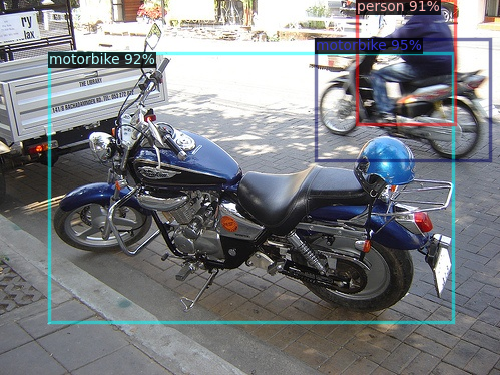

In [71]:
from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

In [73]:
# Initialize count variable
count_motorbike = 0

# Iterate through each dictionary in the list
for item in pred.iloc[9].bboxes:
    # Check if class is 'motorbike' and score is higher than 0.5
    if item['class'] == 'motorbike' and item['score'] > 0.5:
        # Increment count
        count_motorbike += 1
        # Print bbox
        print("Bounding Box:", item['bbox'])

# Print the count
print("Number of motorbikes with score higher than 0.5:", count_motorbike)

Bounding Box: [315.6957702636719, 38.54247283935547, 489.9585876464844, 160.1694793701172]
Bounding Box: [48.916748046875, 53.15742492675781, 453.2772216796875, 321.71038818359375]
Number of motorbikes with score higher than 0.5: 2


In [74]:
from autogluon.multimodal import download
image_url = "https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/detection/street_small.jpg"
test_image = download(image_url)

In [85]:
torch.set_float32_matmul_precision('medium')

In [86]:
pred_test_image = predictor.predict({"image": [test_image]})
print(pred_test_image)
type(pred_test_image)

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
              image                                             bboxes
0  street_small.jpg  [{'class': 'person', 'class_id': 8, 'bbox': [2...


pandas.core.frame.DataFrame

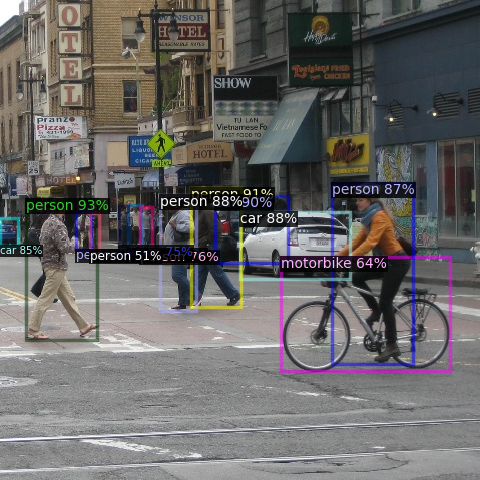

In [87]:
conf_threshold = 0.5
image_result = pred_test_image.iloc[0]
img_path = image_result.image
visualizer = Visualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image
img = Image.fromarray(visualized, 'RGB')
display(img)